       0    1    2    3    4                5
1      1  5.1  3.5  1.4  0.2      Iris-setosa
2      2  4.9  3.0  1.4  0.2      Iris-setosa
3      3  4.7  3.2  1.3  0.2      Iris-setosa
4      4  4.6  3.1  1.5  0.2      Iris-setosa
5      5  5.0  3.6  1.4  0.2      Iris-setosa
..   ...  ...  ...  ...  ...              ...
96    96  5.7  3.0  4.2  1.2  Iris-versicolor
97    97  5.7  2.9  4.2  1.3  Iris-versicolor
98    98  6.2  2.9  4.3  1.3  Iris-versicolor
99    99  5.1  2.5  3.0  1.1  Iris-versicolor
100  100  5.7  2.8  4.1  1.3  Iris-versicolor

[100 rows x 6 columns]
[[1.  6.9 3.1 4.9 1.5]]
[[1.  5.4 3.4 1.5 0.4]]
[[1.  5.  3.  1.6 0.2]]
[[1.  5.9 3.  4.2 1.5]]
[[1.  5.  3.5 1.6 0.6]]
[[1.  6.4 3.2 4.5 1.5]]
[[1.  5.8 4.  1.2 0.2]]
Accuracy is: 1.0


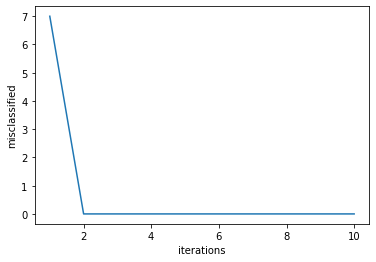

4
[-1.  -2.  -4.6  7.7  3.1]
end


In [79]:
# %load lecture2practice.py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

def load_data():
    dataFrame = pd.read_csv('Iris.csv', header = None)#第一个参数为文件存放地址
#     print(dataFrame)
    
    dataFrame = dataFrame[1:101]#第一行为各数据名称，处理时不需要，所以index为1:101
    print(dataFrame)
    dataFrame[5] = np.where(dataFrame.iloc[:,-1] == 'Iris-setosa', 0, 1)#把Iris—setosa替换为0作为标签， Iris-versicolor替换为1作为标签
    dataFrame = np.asmatrix(dataFrame, dtype = 'float64')
    return dataFrame

def perceptron(data, epochs):
    features = data[:, 1:-1]#第一列为id，不需要此列数据，所以index为1:-1
    labels = data[:, -1]
    (f_train,f_test,l_train,l_test)=train_test_split(features, labels, test_size=0.4)

    w = np.zeros(shape = (1, features.shape[1]+1))
#     for i in w:
#         i+=1
    misclassified_ = []
    
    for i in range(epochs):
        misclassified = 0
        for x, label in zip(f_train, l_train):
            x = np.insert(x,0,1)
            y = np.dot(w, x.T)
            target = 1.0 if (y > 0) else 0.0
            
            delta = (label.item(0,0) - target)
            
            if(delta):
                misclassified +=1
                w += (delta * x)
                print(x)
        
        misclassified_.append(misclassified)
    
    return (w, misclassified_, f_test, l_test)

dataFrame = load_data()

'''#画散点图，blog中感觉是因为她的数据和我们的数据不一样，所以用blog里面代码的index有误，更改的地方为np.array(dataFrame[:50,1]), np.array(dataFrame[:50,3])
plt.scatter(np.array(dataFrame[:50,1]), np.array(dataFrame[:50,3]),marker = 'o', label = 'setosa')
plt.scatter(np.array(dataFrame[50:,1]),np.array(dataFrame[50:,3]),marker = 'o' ,label = 'versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()
plt.show()
'''


epochs = 10
w, misclassified_, f_test, l_test = perceptron(dataFrame, epochs)
misclassification = 0
y_pred = []
for x, label in zip(f_test, l_test) :
    x = np.insert(x,0,1)
    y = np.dot(w, x.T)
    y_pred.append(y)
    if(y!=label):
        misclassification+=1
accuracy = misclassification/len(l_test)
print("Accuracy is:",accuracy)
epochs = np.arange(1, epochs + 1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

print(dataFrame[:, 1:-1].shape[1])
print(w[0])

# fig, ax = plt.subplots(1, 1, figsize=(6, 3))
# ax.plot(x_train[0], x_train[1], 'bo')
# ax.plot(x_train[0], ypred, 'b')
# plt.xlabel("x")
# plt.ylabel("y")
# plt.grid()



print('end')

In [80]:
def perceptron2(data, epochs):
    features = data[:, 1:-1]#第一列为id，不需要此列数据，所以index为1:-1
    labels = data[:, -1]
    
    
    w = np.zeros(shape = (1, features.shape[1]+1))
#     w = [0,1,1]
    misclassified_ = []
    
    for i in range(epochs):
        misclassified = 0
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.T)
            
            if(label.item(0,0)*y<=0):
                misclassified +=1
                w += (label.item(0,0) * x)
                print(x)
        
        misclassified_.append(misclassified)
    
    return (w, misclassified_)

[[ 1. -1.  1.]]
[[ 1.  0. -1.]]


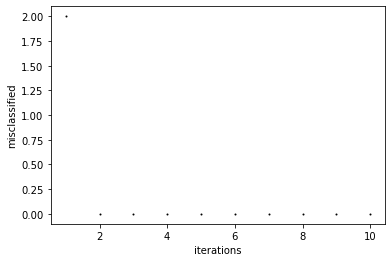

[[ 0. -1.  2.]]
[2, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [81]:
data = np.matrix([[1,2,3],[-1,0,1.5],[1,-1,1],[1,-1,1]])
epochs = 10
w, misclassified_=perceptron2(np.transpose(data), epochs)
epochs = np.arange(1, epochs + 1)
plt.plot(epochs, misclassified_,'ok',ms=1)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()
print(w)
print(misclassified_)